# STEP1: Notebook for extracting stations (every 10 model points, no stations within 10 points of boundary) and visualizing

# Stations get extracted as a .nc to ./DATASETS

In [44]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [45]:
import xarray as xr
import numpy as np
import netCDF4 as nc
from salishsea_tools import (
    viz_tools)
import matplotlib.pyplot as plt

###### set extract_station to True if you want to extract stations

In [46]:
extract_station = False

In [47]:

def make_stns(spacing):
    
    #take every nth x and y in domain, where n is given by spacing
    xs =[]
    ys =[]
    count = 0
    stn_x = []
    stn_y = []
    for i in range (0,200):
        x = 2+i*spacing
        if(x>397):
            break
        else:
            xs.append(x)
        
    for j in range(0,400):
        y = 2+j*spacing
        if(y>897):
            break
        else:
            ys.append(y)
            
    for a in range(0,len(xs)):
        for b in range(0,len(ys)):
            ts_x = xs[a]
            ts_y = ys[b]
            stn_x.append(ts_x)
            stn_y.append(ts_y)
            
    return stn_x, stn_y

def filter_stn_in_domain(stn_x,stn_y,fmask):
    
    # only append the stations that are in water
    d_stn_x = []
    d_stn_y = []
    for s in range(0,len(stn_x)):
        x = stn_x[s]
        y = stn_y[s]
        stn = fmask.values[y-1:y+2,x-1:x+2]
        #if there are no zeroes in s
        if((0 in stn) == False):
            d_stn_x.append(x)
            d_stn_y.append(y)
            
    return d_stn_x, d_stn_y



## only runs if extract_station = True

In [34]:
if extract_station:
    bath = '/data/tjarniko/MEOPAR/NEMO-forcing/grid/mesh_mask201702.nc'
    grid = xr.open_dataset(bath)
    fmask = (grid.fmask[0,0,:,:]) 
    print(np.shape(fmask))

    stn_x, stn_y = make_stns(10)
    d_stn_x, d_stn_y = filter_stn_in_domain(stn_x,stn_y,fmask)

    d_stn_xar0 = np.array(d_stn_x)
    d_stn_yar0 = np.array(d_stn_y)

    edge = np.where((d_stn_xar0<=10) | (d_stn_yar0>=888))
    np.squeeze(edge)
    np.shape(edge)
    edgear = np.array(edge)
    edgear = edgear[0]
    print(edge)
    d_stn_xar =np.delete(d_stn_xar0,edge)
    d_stn_yar = np.delete(d_stn_yar0,edge)
    print(np.size(d_stn_xar))


    ncname = './DATASETS/X_AND_Y_COORDS.nc'
    f = nc.Dataset(ncname,'w', format='NETCDF4') #'w' stands for write
    #g = f.createGroup('model_output')
    f.createDimension('ref', len(d_stn_xar))
    ts2 = f.createVariable('stn_ycoords','f4',('ref'))
    ts2[:] = d_stn_yar[:]
    ts3 = f.createVariable('stn_xcoords','f4',('ref'))
    ts3[:] = d_stn_xar[:]

    f.close()
    
    
    


In [35]:
stns = nc.Dataset('./DATASETS/X_AND_Y_COORDS.nc')
print(stns)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): ref(611)
    variables(dimensions): float32 stn_ycoords(ref), float32 stn_xcoords(ref)
    groups: 



## MAP STATIONS

Text(0.5, 0.98, '611 stations for clustering')

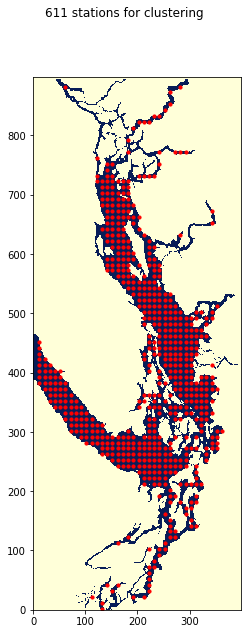

In [49]:
fact = 0.7
markersize = 10
fig, ax = plt.subplots(1,1, figsize=(20*fact, 14*fact), facecolor='w', edgecolor='k')
plt.rcParams['image.cmap'] = 'YlGnBu'

viz_tools.set_aspect(ax)   
fmask = (grid.fmask[0,0,:,:])    
mesh = ax.pcolormesh(fmask, vmin=0, vmax=1, )
pts = ax.scatter(stns['stn_xcoords'][:],stns['stn_ycoords'][:],\
                 s=markersize,c='red',marker='o')
plt.suptitle('611 stations for clustering')
